# ABE 516 Project Data Processing 3

## Nitrate Load Calculation

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime as dt

# allow plots to appear directly in the notebook
%matplotlib inline

### Read in processed cumulative flow and nitrate concentration files

In [5]:
conc_df = pd.read_csv("no3_conc.csv")
flow_df = pd.read_csv("cumu_flow.csv")

In [27]:
conc_df.head()

,Sample Date,Site ID,Site Code,Sample Location,NO3-N-clean
0,2022-04-11,SH210101,SH,01,3.3
1,2022-04-11,SH210102,SH,02,0.4
2,2022-04-11,SH210103,SH,03,0.0
3,2022-04-11,SH210104,SH,04,6.1
4,2022-04-11,SH210105,SH,05,5.8


In [7]:
flow_df.head()

,Date,flow_in_gpm,flow_bypass_gpm,flow_treated_daily_avg_gpm,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu
0,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-03,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-04,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-05,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
conc_df.dtypes

Sample Date         object
Site ID             object
Site Code           object
Sample Location     object
NO3-N-clean        float64
dtype: object

In [21]:
conc_df = conc_df.astype({"Site ID":"string",
                       "Site Code":"string",
                       "Sample Location":"string", 
                        })
conc_df["Sample Date"] = pd.to_datetime(conc_df["Sample Date"])
conc_df.dtypes

Sample Date        datetime64[ns]
Site ID                    string
Site Code                  string
Sample Location            string
NO3-N-clean               float64
dtype: object

**Extract Unique Sample Dates**

In [11]:
sample_dates = pd.DataFrame(conc_df["Sample Date"].unique())
sample_dates

,0
0,2022-04-11
1,2021-12-31
2,2022-04-26
3,2022-05-09
4,2022-05-17
5,2022-05-31
6,2022-06-14
7,2022-06-21
8,2022-06-28
9,2022-07-06


In [95]:
# Add well groups to concentration data
conc_df["well_group"] = np.where((conc_df["Sample Location"] == "01") | 
                                 (conc_df["Sample Location"] == "04"), "fieldside", conc_df["well_group"])
conc_df["well_group"] = np.where((conc_df["Sample Location"] == "02") | 
                                 (conc_df["Sample Location"] == "05"), "mid", conc_df["well_group"])
conc_df["well_group"] = np.where((conc_df["Sample Location"] == "03") | 
                                 (conc_df["Sample Location"] == "06"), "streamside", conc_df["well_group"])
conc_df["well_group"] = np.where((conc_df["Sample Location"] == "BX"), "box", conc_df["well_group"])
conc_df["well_group"] = np.where((conc_df["Sample Location"] == "CK"), "stream", conc_df["well_group"])
conc_df["well_group"] = np.where((conc_df["Sample Location"] == "BL"), "blank", conc_df["well_group"])

In [96]:
conc_df[0:25]

,Sample Date,Site ID,Site Code,Sample Location,NO3-N-clean,well_group
0,2022-04-11,SH210101,SH,01,3.3,fieldside
1,2022-04-11,SH210102,SH,02,0.4,mid
2,2022-04-11,SH210103,SH,03,0.0,streamside
3,2022-04-11,SH210104,SH,04,6.1,fieldside
4,2022-04-11,SH210105,SH,05,5.8,mid
5,2022-04-11,SH210106,SH,06,1.9,streamside
6,2022-04-11,SH2101BX,SH,BX,11.2,box
7,2022-04-11,SH2101CK,SH,CK,13.6,stream
8,2021-12-31,000000BL,00,BL,0.0,blank
9,2022-04-26,SH211601,SH,01,2.2,fieldside


In [97]:
#Average concentration by well group
conc_df2 = conc_df.groupby(["Sample Date", "well_group"])["NO3-N-clean"].mean()
conc_df2 = pd.DataFrame(conc_df2)
conc_df2 = conc_df2.reset_index()
conc_df2[0:15]

,Sample Date,well_group,NO3-N-clean
0,2021-12-31,blank,0.00
1,2022-04-11,box,11.20
2,2022-04-11,fieldside,4.70
3,2022-04-11,mid,3.10
4,2022-04-11,stream,13.60
5,2022-04-11,streamside,0.95
6,2022-04-26,box,18.90
7,2022-04-26,fieldside,4.05
8,2022-04-26,mid,3.60
9,2022-04-26,stream,13.80


In [98]:
conc_df3 = pd.pivot(conc_df2, index = "Sample Date", columns = "well_group", values = "NO3-N-clean")
conc_df3 = conc_df3.reset_index()
conc_df3.head()

well_group,Sample Date,blank,box,fieldside,mid,stream,streamside
0,2021-12-31,0.0,NaN,NaN,NaN,NaN,NaN
1,2022-04-11,NaN,11.20,4.7000,3.1000,13.60,0.9500
2,2022-04-26,NaN,18.90,4.0500,3.6000,13.80,2.0000
3,2022-05-09,NaN,23.50,3.1000,1.6000,15.60,1.8000
4,2022-05-17,NaN,21.39,4.3425,2.2475,17.97,1.4875


In [99]:
conc_df3.dtypes

well_group
Sample Date    datetime64[ns]
blank                 float64
box                   float64
fieldside             float64
mid                   float64
stream                float64
streamside            float64
dtype: object

In [100]:
samples_flow_df = flow_df.loc[flow_df["Date"].isin(sample_dates[0])]
samples_flow_df = conc_flow_df.reset_index(drop=True)
samples_flow_df.rename(columns = {"Date":"Sample Date"}, inplace = True)
samples_flow_df[0:15]

,Sample Date,flow_in_gpm,flow_bypass_gpm,flow_treated_daily_avg_gpm,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu
0,2022-04-11,1.531902,0.000000,1.531902,174.826753,22.792443,152.034310
1,2022-04-26,29.210554,25.845161,3.365393,832.193502,510.603255,326.703352
2,2022-05-09,82.595954,106.099928,0.000000,1297.037233,988.759559,387.884079
3,2022-05-17,15.335463,9.221809,6.113654,1494.805670,1166.168314,417.973454
4,2022-05-31,18.903223,15.843741,3.059482,1843.684384,1529.795369,442.837762
5,2022-06-14,20.399919,16.090717,4.309202,2297.308846,2038.672836,472.033629
6,2022-06-21,17.295003,9.141324,8.153679,2488.646183,2233.649192,492.895132
7,2022-06-28,8.126857,0.123793,8.003064,2573.082362,2256.517998,554.462504
8,2022-07-06,8.646066,2.016111,6.629955,2636.723613,2279.052602,596.728831
9,2022-07-14,7.132687,0.394216,6.738471,2798.537637,2429.817985,637.588160


In [101]:
samples_flow_df.dtypes

Sample Date                    object
flow_in_gpm                   float64
flow_bypass_gpm               float64
flow_treated_daily_avg_gpm    float64
flow_in_cumu                  float64
flow_bypass_cumu              float64
flow_treated_cumu             float64
dtype: object

In [108]:
samples_flow_df["Sample Date"] = pd.to_datetime(samples_flow_df["Sample Date"])

In [134]:
flow_conc_df = pd.merge(conc_df3, samples_flow_df, on = "Sample Date", how = "inner")
flow_conc_df[0:15]
flow_conc_df = flow_conc_df.drop(["blank","flow_in_gpm","flow_bypass_gpm","flow_treated_daily_avg_gpm"],  axis = 1)

In [135]:
flow_conc_df

,Sample Date,box,fieldside,mid,stream,streamside,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu
0,2022-04-11,11.2000,4.70000,3.100000,13.6000,0.950000,174.826753,22.792443,152.034310
1,2022-04-26,18.9000,4.05000,3.600000,13.8000,2.000000,832.193502,510.603255,326.703352
2,2022-05-09,23.5000,3.10000,1.600000,15.6000,1.800000,1297.037233,988.759559,387.884079
3,2022-05-17,21.3900,4.34250,2.247500,17.9700,1.487500,1494.805670,1166.168314,417.973454
4,2022-05-31,26.0300,8.33000,5.520000,20.2200,2.495000,1843.684384,1529.795369,442.837762
5,2022-06-14,28.8500,3.95500,7.265000,23.1900,2.320000,2297.308846,2038.672836,472.033629
6,2022-06-21,27.8500,11.08500,4.990000,22.3100,3.795000,2488.646183,2233.649192,492.895132
7,2022-06-28,28.0200,17.16500,9.030000,22.5700,4.805000,2573.082362,2256.517998,554.462504
8,2022-07-06,26.4570,16.08250,9.720500,19.8670,5.868175,2636.723613,2279.052602,596.728831
9,2022-07-14,24.2670,17.25275,8.929125,18.4815,9.771200,2798.537637,2429.817985,637.588160


In [137]:
flow_conc_df["flow_in_inc"] = flow_conc_df["flow_in_cumu"].diff().fillna(flow_conc_df["flow_in_cumu"])
flow_conc_df["flow_treated_inc"] = flow_conc_df["flow_treated_cumu"].diff().fillna(flow_conc_df["flow_treated_cumu"])
flow_conc_df[0:15]

,Sample Date,box,fieldside,mid,stream,streamside,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu,flow_in_inc,flow_treated_inc
0,2022-04-11,11.2000,4.70000,3.100000,13.6000,0.950000,174.826753,22.792443,152.034310,174.826753,152.034310
1,2022-04-26,18.9000,4.05000,3.600000,13.8000,2.000000,832.193502,510.603255,326.703352,657.366749,174.669042
2,2022-05-09,23.5000,3.10000,1.600000,15.6000,1.800000,1297.037233,988.759559,387.884079,464.843731,61.180727
3,2022-05-17,21.3900,4.34250,2.247500,17.9700,1.487500,1494.805670,1166.168314,417.973454,197.768437,30.089375
4,2022-05-31,26.0300,8.33000,5.520000,20.2200,2.495000,1843.684384,1529.795369,442.837762,348.878714,24.864307
5,2022-06-14,28.8500,3.95500,7.265000,23.1900,2.320000,2297.308846,2038.672836,472.033629,453.624461,29.195868
6,2022-06-21,27.8500,11.08500,4.990000,22.3100,3.795000,2488.646183,2233.649192,492.895132,191.337338,20.861503
7,2022-06-28,28.0200,17.16500,9.030000,22.5700,4.805000,2573.082362,2256.517998,554.462504,84.436179,61.567372
8,2022-07-06,26.4570,16.08250,9.720500,19.8670,5.868175,2636.723613,2279.052602,596.728831,63.641251,42.266327
9,2022-07-14,24.2670,17.25275,8.929125,18.4815,9.771200,2798.537637,2429.817985,637.588160,161.814024,40.859329


In [141]:
flow_conc_df["Load_in_inc_kg"] = flow_conc_df["box"] * flow_conc_df["flow_in_inc"]*60*24*3.785/1000000
flow_conc_df["Load_diverted_inc_kg"] = flow_conc_df["box"] * flow_conc_df["flow_treated_inc"]*60*24*3.785/1000000
flow_conc_df["Load_removed_inc_kg"] = (flow_conc_df["box"]-flow_conc_df["streamside"]) * flow_conc_df["flow_treated_inc"]*60*24*3.785/1000000
flow_conc_df

,Sample Date,box,fieldside,mid,stream,streamside,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu,flow_in_inc,flow_treated_inc,Load_in_inc_kg,Load_diverted_inc_kg,Load_removed_inc_kg
0,2022-04-11,11.2000,4.70000,3.100000,13.6000,0.950000,174.826753,22.792443,152.034310,174.826753,152.034310,10.672208,9.280855,8.493640
1,2022-04-26,18.9000,4.05000,3.600000,13.8000,2.000000,832.193502,510.603255,326.703352,657.366749,174.669042,67.717032,17.993105,16.089073
2,2022-05-09,23.5000,3.10000,1.600000,15.6000,1.800000,1297.037233,988.759559,387.884079,464.843731,61.180727,59.539230,7.836297,7.236070
3,2022-05-17,21.3900,4.34250,2.247500,17.9700,1.487500,1494.805670,1166.168314,417.973454,197.768437,30.089375,23.056647,3.507941,3.263993
4,2022-05-31,26.0300,8.33000,5.520000,20.2200,2.495000,1843.684384,1529.795369,442.837762,348.878714,24.864307,49.496788,3.527597,3.189473
5,2022-06-14,28.8500,3.95500,7.265000,23.1900,2.320000,2297.308846,2038.672836,472.033629,453.624461,29.195868,71.329743,4.590876,4.221697
6,2022-06-21,27.8500,11.08500,4.990000,22.3100,3.795000,2488.646183,2233.649192,492.895132,191.337338,20.861503,29.043791,3.166643,2.735139
7,2022-06-28,28.0200,17.16500,9.030000,22.5700,4.805000,2573.082362,2256.517998,554.462504,84.436179,61.567372,12.895111,9.402582,7.790183
8,2022-07-06,26.4570,16.08250,9.720500,19.8670,5.868175,2636.723613,2279.052602,596.728831,63.641251,42.266327,9.177147,6.094856,4.743014
9,2022-07-14,24.2670,17.25275,8.929125,18.4815,9.771200,2798.537637,2429.817985,637.588160,161.814024,40.859329,21.402309,5.404253,3.228210


In [144]:
flow_conc_df["Load_in_cumu_kg"] = np.cumsum(flow_conc_df["Load_in_inc_kg"])
flow_conc_df["Load_diverted_cumu_kg"] = np.cumsum(flow_conc_df["Load_diverted_inc_kg"])
flow_conc_df["Load_removed_cumu_kg"] = np.cumsum(flow_conc_df["Load_removed_inc_kg"])
flow_conc_df

,Sample Date,box,fieldside,mid,stream,streamside,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu,flow_in_inc,flow_treated_inc,Load_in_inc_kg,Load_diverted_inc_kg,Load_removed_inc_kg,Load_in_cumu_kg,Load_diverted_cumu_kg,Load_removed_cumu_kg
0,2022-04-11,11.2000,4.70000,3.100000,13.6000,0.950000,174.826753,22.792443,152.034310,174.826753,152.034310,10.672208,9.280855,8.493640,10.672208,9.280855,8.493640
1,2022-04-26,18.9000,4.05000,3.600000,13.8000,2.000000,832.193502,510.603255,326.703352,657.366749,174.669042,67.717032,17.993105,16.089073,78.389240,27.273961,24.582713
2,2022-05-09,23.5000,3.10000,1.600000,15.6000,1.800000,1297.037233,988.759559,387.884079,464.843731,61.180727,59.539230,7.836297,7.236070,137.928470,35.110257,31.818783
3,2022-05-17,21.3900,4.34250,2.247500,17.9700,1.487500,1494.805670,1166.168314,417.973454,197.768437,30.089375,23.056647,3.507941,3.263993,160.985117,38.618199,35.082775
4,2022-05-31,26.0300,8.33000,5.520000,20.2200,2.495000,1843.684384,1529.795369,442.837762,348.878714,24.864307,49.496788,3.527597,3.189473,210.481905,42.145795,38.272248
5,2022-06-14,28.8500,3.95500,7.265000,23.1900,2.320000,2297.308846,2038.672836,472.033629,453.624461,29.195868,71.329743,4.590876,4.221697,281.811648,46.736671,42.493945
6,2022-06-21,27.8500,11.08500,4.990000,22.3100,3.795000,2488.646183,2233.649192,492.895132,191.337338,20.861503,29.043791,3.166643,2.735139,310.855439,49.903315,45.229083
7,2022-06-28,28.0200,17.16500,9.030000,22.5700,4.805000,2573.082362,2256.517998,554.462504,84.436179,61.567372,12.895111,9.402582,7.790183,323.750550,59.305897,53.019267
8,2022-07-06,26.4570,16.08250,9.720500,19.8670,5.868175,2636.723613,2279.052602,596.728831,63.641251,42.266327,9.177147,6.094856,4.743014,332.927696,65.400753,57.762281
9,2022-07-14,24.2670,17.25275,8.929125,18.4815,9.771200,2798.537637,2429.817985,637.588160,161.814024,40.859329,21.402309,5.404253,3.228210,354.330005,70.805007,60.990491


**Plot Cumulative NO3-N Load Removal**

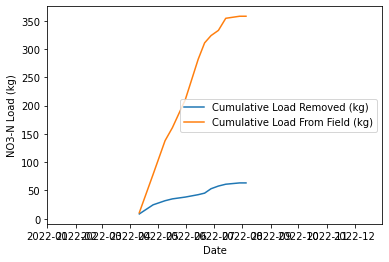

In [166]:
plt.plot(flow_conc_df["Sample Date"], flow_conc_df["Load_removed_cumu_kg"], label = "Cumulative Load Removed (kg)")
plt.plot(flow_conc_df["Sample Date"], flow_conc_df["Load_in_cumu_kg"], label = "Cumulative Load From Field (kg)")
plt.ylabel("NO3-N Load (kg)")
plt.xlabel("Date")
plt.xlim([dt.date(2022, 1, 1), dt.date(2022, 12, 31)])
plt.legend()
plt.show()

## Create final summary dataset

In [159]:
summary_df = flow_conc_df.tail(1).reset_index(drop = True).drop(
    ["box", "fieldside", "mid", "stream", "streamside", "flow_in_inc", "flow_treated_inc",
    "Load_in_inc_kg", "Load_diverted_inc_kg", "Load_removed_inc_kg"], axis = 1)
summary_df["Year"] = summary_df["Sample Date"].dt.year
summary_df = summary_df.drop("Sample Date", axis =1)
summary_df

,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu,Load_in_cumu_kg,Load_diverted_cumu_kg,Load_removed_cumu_kg,Year
0,2829.95872,2429.821701,669.005528,357.941764,74.416339,63.295317,2022


In [162]:
summary_df["in_buffer_removal_percent"] = summary_df["Load_removed_cumu_kg"] / summary_df["Load_diverted_cumu_kg"] * 100
summary_df["eof_removal_percent"] = summary_df["Load_removed_cumu_kg"] / summary_df["Load_in_cumu_kg"] * 100
summary_df

,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu,Load_in_cumu_kg,Load_diverted_cumu_kg,Load_removed_cumu_kg,Year,in_buffer_removal_percent,eof_removal_percent
0,2829.95872,2429.821701,669.005528,357.941764,74.416339,63.295317,2022,85.055672,17.683133


In [163]:
drainage_area_ha = 3.4
summary_df["NO3-N_yield_in"] = summary_df["Load_in_cumu_kg"] / drainage_area_ha
summary_df["NO3-N_yield_diverted"] = summary_df["Load_diverted_cumu_kg"] / drainage_area_ha
summary_df["NO3-N_yield_removed"] = summary_df["Load_removed_cumu_kg"] / drainage_area_ha
summary_df

,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu,Load_in_cumu_kg,Load_diverted_cumu_kg,Load_removed_cumu_kg,Year,in_buffer_removal_percent,eof_removal_percent,NO3-N_yield_in,NO3-N_yield_diverted,NO3-N_yield_removed
0,2829.95872,2429.821701,669.005528,357.941764,74.416339,63.295317,2022,85.055672,17.683133,105.27699,21.887158,18.61627


In [164]:
summary_df.to_csv("SH_2022_summary.csv", index = False)